In [1]:
%reset -sf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import collections as mc
import seaborn as sns

from bs4 import BeautifulSoup

## Process files

In [2]:
with open('./residents-subzone-2017.kml', 'r') as f:
    soup = BeautifulSoup(f, 'xml')

In [3]:
placemarks = [placemark for placemark in soup.find_all('Placemark')]

In [4]:
placemarks[0].ExtendedData.SchemaData

<SchemaData schemaUrl="#kml_schema_ft_SUBZONE_DWELLING_TYPE_2017">
<SimpleData name="SUBZONE_N">MARINA SOUTH</SimpleData>
<SimpleData name="PLN_AREA_N">MARINA SOUTH</SimpleData>
<SimpleData name="TOTAL">0</SimpleData>
<SimpleData name="HDB">0</SimpleData>
<SimpleData name="ONE_TO_TWO_RM">0</SimpleData>
<SimpleData name="THREE_RM">0</SimpleData>
<SimpleData name="FOUR_RM">0</SimpleData>
<SimpleData name="FIVE_RM_EXEC_FLATS">0</SimpleData>
<SimpleData name="CONDOS_OTHER_APTS">0</SimpleData>
<SimpleData name="LANDED_PROPERTIES">0</SimpleData>
<SimpleData name="OTHERS">0</SimpleData>
<SimpleData name="INC_CRC">A414A47E5AA4EDB5</SimpleData>
<SimpleData name="FMEL_UPD_D">20170927160941</SimpleData>
</SchemaData>

In [5]:
print(len(placemarks))

323


In [6]:
# reading one datapoint
sample = [
placemarks[0].get('id'),
placemarks[0].snippet,
# placemarks[0].description,
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"SUBZONE_N"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"PLN_AREA_N"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"TOTAL"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"HDB"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"ONE_TO_TWO_RM"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"THREE_RM"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"FOUR_RM"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"FIVE_RM_EXEC_FLATS"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"CONDOS_OTHER_APTS"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"LANDED_PROPERTIES"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"OTHERS"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"INC_CRC"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"FMEL_UPD_D"}),
# [[float(num) for num in pt.split(",")] 
#  for pt in placemarks[26].Polygon.outerBoundaryIs.LinearRing.text.strip().split(" ")],
# [[float(num) for num in pt.split(",")] 
#  for pt in placemarks[26].Polygon.text.strip().replace("\n\n\n\n\n", " ").split(" ")]
]
sample

['kml_1',
 <snippet> </snippet>,
 <SimpleData name="SUBZONE_N">MARINA SOUTH</SimpleData>,
 <SimpleData name="PLN_AREA_N">MARINA SOUTH</SimpleData>,
 <SimpleData name="TOTAL">0</SimpleData>,
 <SimpleData name="HDB">0</SimpleData>,
 <SimpleData name="ONE_TO_TWO_RM">0</SimpleData>,
 <SimpleData name="THREE_RM">0</SimpleData>,
 <SimpleData name="FOUR_RM">0</SimpleData>,
 <SimpleData name="FIVE_RM_EXEC_FLATS">0</SimpleData>,
 <SimpleData name="CONDOS_OTHER_APTS">0</SimpleData>,
 <SimpleData name="LANDED_PROPERTIES">0</SimpleData>,
 <SimpleData name="OTHERS">0</SimpleData>,
 <SimpleData name="INC_CRC">A414A47E5AA4EDB5</SimpleData>,
 <SimpleData name="FMEL_UPD_D">20170927160941</SimpleData>]

In [7]:
# pm.ExtendedData.decompose()
# pm.description.decompose()
# pm.text[14:].strip().split(" ")

In [8]:
placemark_data = []

for placemark in placemarks:
    val_TOTAL = int(placemark.ExtendedData.SchemaData.find("SimpleData", {"name":"TOTAL"}).text)
    val_SUBZONE_N = placemark.ExtendedData.SchemaData.find("SimpleData", {"name":"SUBZONE_N"}).text
    val_PLN_AREA_N = placemark.ExtendedData.SchemaData.find("SimpleData", {"name":"PLN_AREA_N"}).text
    placemark.ExtendedData.decompose()
    placemark.description.decompose()
    placemark_data.append([
        placemark.get('id'),
        val_TOTAL,
        val_SUBZONE_N,
        val_PLN_AREA_N,
#         [[float(num) for num in pt.split(",")] 
#          for pt in placemark.Polygon.text.strip().replace("\n\n\n\n\n", " ").split(" ")]
#         [[float(num) for num in pt.split(",")] 
#          for pt in placemark.Polygon.outerBoundaryIs.LinearRing.text.strip().split(" ")]
#         [[float(num) for num in pt.split(",")] 
#          for pt in placemark.text[14:].strip().replace("\n\n\n\n\n", " ").split(" ")]
        [[[float(num) for num in pt.split(",")] 
          for pt in ring.split(" ")] 
         for ring in placemark.text[14:].strip().split("\n\n\n\n\n")]
    ])

In [9]:
df = pd.DataFrame(placemark_data, 
                  columns=["id", "TOTAL", "SUBZONE_N", "PLN_AREA_N", "boundary"])

In [10]:
sum(df["TOTAL"])

3966030

## Calculate the centre of subzone
This is an estimate

In [11]:
def centre_boundary(boundary):
    boundary = sum(row["boundary"], [])  # flatten one level
    x_mean = sum([b[0] for b in boundary])/len(boundary)
    y_mean = sum([b[1] for b in boundary])/len(boundary)
    return x_mean, y_mean

In [12]:
df["x_centre"] = np.nan
df["y_centre"] = np.nan

In [13]:
for index, row in df.iterrows():
    x_mean, y_mean = centre_boundary(row["boundary"])
    df.at[index, "x_centre"] = x_mean
    df.at[index, "y_centre"] = y_mean

In [14]:
df.head(5)

,id,TOTAL,SUBZONE_N,PLN_AREA_N,boundary,x_centre,y_centre
0,kml_1,0,MARINA SOUTH,MARINA SOUTH,"[[[103.864727625087, 1.28884988006674, 0.0], [...",103.868148,1.281249
1,kml_2,7710,PEARL'S HILL,OUTRAM,"[[[103.843133115736, 1.28778177841935, 0.0], [...",103.839732,1.284103
2,kml_3,140,BOAT QUAY,SINGAPORE RIVER,"[[[103.850681360066, 1.28649059616468, 0.0], [...",103.848253,1.286980
3,kml_4,11870,HENDERSON HILL,BUKIT MERAH,"[[[103.825512734945, 1.28812398702608, 0.0], [...",103.820963,1.286102
4,kml_5,12190,REDHILL,BUKIT MERAH,"[[[103.819400411545, 1.29116924028884, 0.0], [...",103.817493,1.287359


## Display histogram

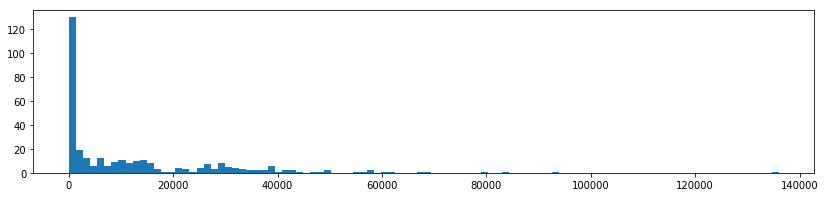

46

In [15]:
plt.figure(figsize=(14,3))
plt.hist(df["TOTAL"], bins=100)
plt.show()
len([x for x in df["TOTAL"] if x > 30000])

## Display map

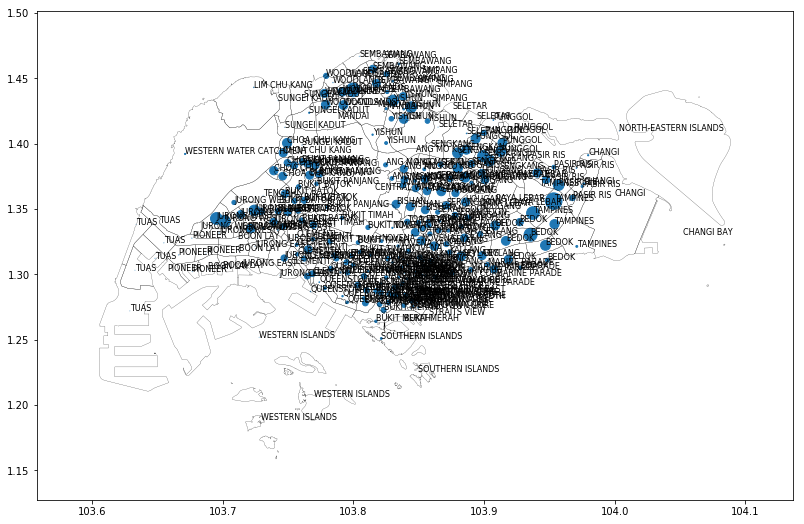

CPU times: user 4.12 s, sys: 295 ms, total: 4.42 s
Wall time: 4.43 s


In [16]:
%%time
fig, ax = plt.subplots(figsize=(14,9))
plt.scatter(df["x_centre"], df["y_centre"], df["TOTAL"]/500)
lines = []

for i,(x,y,z) in enumerate(zip(df["x_centre"], df["y_centre"], df["PLN_AREA_N"])):
    plt.text(x,y,z,fontsize=8)

for rings in df["boundary"]:
    for b in rings:
        n = len(b)
        for e,_ in enumerate(b):
            lines.append([[b[e%n][0], b[e%n][1]], [b[(e+1)%n][0], b[(e+1)%n][1]]])
lc = mc.LineCollection(lines, colors="black", linewidths=0.2)
ax.add_collection(lc)
ax.autoscale()
ax.set_aspect(1)
ax.margins(0.1)
plt.show()

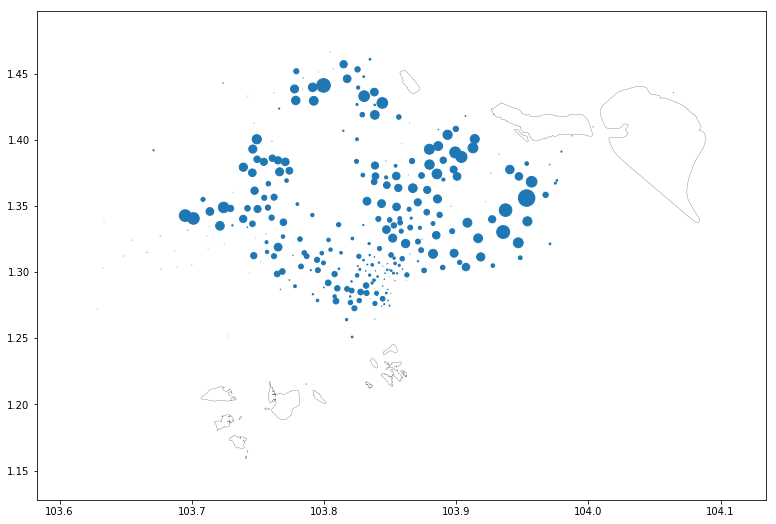

CPU times: user 298 ms, sys: 11.2 ms, total: 309 ms
Wall time: 310 ms


In [17]:
%%time
# probably should combine all these subzone into one
# lst = [24,27,28,29,31,32,69,73,83,84,104,105,106,110,118,135,140,164,322]
lst = [25,26,27,293,322]
fig, ax = plt.subplots(figsize=(14,9))
plt.scatter(df["x_centre"], df["y_centre"], df["TOTAL"]/500)
lines = []
for i,rings in enumerate(df["boundary"]):
    if i not in lst:
        continue
    for b in rings:
        n = len(b)
        for e,_ in enumerate(b):
            lines.append([[b[e%n][0], b[e%n][1]], [b[(e+1)%n][0], b[(e+1)%n][1]]])
lc = mc.LineCollection(lines, colors="black", linewidths=0.2)
ax.add_collection(lc)
ax.autoscale()
ax.set_aspect(1)
ax.margins(0.1)
plt.show()

# Merge subzones
Some subzone do not share a boundary, we merge it with a subzone in the mainland

In [18]:
mergers = ((25,24), (26,24), (27,28), (293,268), (322,308))
def merge(child, mainland):
    df.at[mainland,"TOTAL"] += df.loc[child]["TOTAL"]
    df.at[mainland,"boundary"].extend(df.loc[child]["boundary"])
for merger in mergers:
    merge(merger[0], merger[1])
df = df.drop([x for x,_ in mergers])
df = df.reset_index()
print(df.shape)
df.sample(5)

(318, 8)


,index,id,TOTAL,SUBZONE_N,PLN_AREA_N,boundary,x_centre,y_centre
301,305,kml_306,38240,YISHUN SOUTH,YISHUN,"[[[103.843988464051, 1.42315977899469, 0.0], [...",103.838473,1.419002
236,239,kml_240,44110,TRAFALGAR,HOUGANG,"[[[103.881516457454, 1.38773886870307, 0.0], [...",103.879828,1.381399
7,7,kml_8,120,CLARKE QUAY,SINGAPORE RIVER,"[[[103.845460189953, 1.28669796391714, 0.0], [...",103.844334,1.289594
210,213,kml_214,6520,DAIRY FARM,BUKIT PANJANG,"[[[103.775193782436, 1.37027121132434, 0.0], [...",103.771704,1.369318
132,135,kml_136,120,PORT,QUEENSTOWN,"[[[103.765070328849, 1.29540241603394, 0.0], [...",103.767118,1.286936


## Identify adjacent subzones

In [19]:
df["adjacent"] = [[] for x in df["id"]]

In [20]:
from collections import defaultdict

d_pts = defaultdict(set)

for index, row in df.iterrows():
    for ring in row["boundary"]:
        for pt in ring:
            d_pts[(pt[0],pt[1])].add(index)

In [21]:
for index, row in df.iterrows():
    adj_set = set()
    for ring in row["boundary"]:
        for pt in ring:
            adj_set |= d_pts[(pt[0],pt[1])]    
    df.at[index, "adjacent"] = list(adj_set - {index})

In [22]:
df.sample(5)

,index,id,TOTAL,SUBZONE_N,PLN_AREA_N,boundary,x_centre,y_centre,adjacent
8,8,kml_9,13080,TELOK BLANGAH RISE,BUKIT MERAH,"[[[103.828678271805, 1.27469463408973, 0.0], [...",103.823034,1.272720,"[10, 11, 14, 26, 29]"
183,186,kml_187,15870,TOH GUAN,JURONG EAST,"[[[103.748953264655, 1.33639998439199, 0.0], [...",103.745906,1.336612,"[198, 199, 173, 143, 243, 55]"
147,150,kml_151,10,PAYA LEBAR EAST,PAYA LEBAR,"[[[103.923027648697, 1.34749677401861, 0.0], [...",103.922312,1.353338,"[197, 165, 201, 212, 221, 222]"
301,305,kml_306,38240,YISHUN SOUTH,YISHUN,"[[[103.843988464051, 1.42315977899469, 0.0], [...",103.838473,1.419002,"[261, 298, 204, 207, 313, 316]"
274,277,kml_278,13440,NORTH COAST,WOODLANDS,"[[[103.776644337178, 1.45144955073494, 0.0], [...",103.779108,1.452005,"[268, 270, 303, 279, 281]"


## Compute overlapping parameters

In [23]:
def compute_shared_parameter(b1,b2):
    
    d1 = set()
    d2 = set()
    
    for i,rings in enumerate([b1]):
        for b in b1:
            n = len(b)
            for e,_ in enumerate(b):
                uv = ((b[e%n][0], b[e%n][1]), (b[(e+1)%n][0], b[(e+1)%n][1]))
                d1.add((uv[0],uv[1]))
                d1.add((uv[1],uv[0]))
            
    for i,rings in enumerate([b2]):
        for b in rings:
            n = len(b)
            for e,_ in enumerate(b):
                uv = ((b[e%n][0], b[e%n][1]), (b[(e+1)%n][0], b[(e+1)%n][1]))
                d2.add((uv[0],uv[1]))
                d2.add((uv[1],uv[0]))
                
    d3 = d1.intersection(d2)
    shared = sum([((x1-x2)**2 + (y1-y2)**2)**0.5 
                  for ((x1,y1),(x2,y2)) in list(d3)])
    
    return shared/2

# example
b1 = [row for index, row in df.iterrows()][90]["boundary"]
b2 = [row for index, row in df.iterrows()][78]["boundary"]
compute_shared_parameter(b1,b2)

0.0

In [24]:
row

index                                                       321
id                                                      kml_322
TOTAL                                                        10
SUBZONE_N                             WOODLANDS REGIONAL CENTRE
PLN_AREA_N                                            WOODLANDS
boundary      [[[103.785998712995, 1.43436081042998, 0.0], [...
x_centre                                                103.784
y_centre                                                1.43834
adjacent                                                     []
Name: 317, dtype: object

In [25]:
shared_params_col = []
adj_filtered_col = []
for index, row in df.iterrows():
    shared_params = []
    adj_filtered = []
    for adj_index in row["adjacent"]:
        shared_param = compute_shared_parameter(df.at[index, "boundary"],
                                                df.at[adj_index, "boundary"])
        if shared_param == 0: continue
        adj_filtered.append(adj_index)
        shared_params.append(shared_param)
    adj_filtered_col.append(adj_filtered)
    shared_params_col.append(shared_params)
df["adjacent"] = adj_filtered_col
df["shared_param"] = shared_params_col
df.sample(5)

,index,id,TOTAL,SUBZONE_N,PLN_AREA_N,boundary,x_centre,y_centre,adjacent,shared_param
50,53,kml_54,10380,MOUNTBATTEN,MARINE PARADE,"[[[103.894802290868, 1.29606021583453, 0.0], [...",103.889812,1.303557,"[75, 44, 49, 121, 59, 93]","[0.013294593687056542, 0.004639747831378699, 0..."
232,235,kml_236,0,LORONG HALUS NORTH,SENGKANG,"[[[103.914350255804, 1.38589734751318, 0.0], [...",103.911930,1.380830,"[224, 230, 272, 284]","[0.0072104850614546495, 0.010036061334167828, ..."
167,170,kml_171,3890,DUNEARN,NOVENA,"[[[103.826890385783, 1.32656397906872, 0.0], [...",103.821491,1.325498,"[98, 116, 244, 245, 122]","[0.007093020840167996, 0.003872526682975784, 0..."
125,128,kml_129,33900,FRANKEL,BEDOK,"[[[103.910158048008, 1.30560579617799, 0.0], [...",103.918581,1.311560,"[99, 72, 171, 44, 118, 58, 59, 93]","[0.010162738260656227, 0.016685011582752214, 0..."
188,191,kml_192,910,LAKESIDE,JURONG EAST,"[[[103.726899009877, 1.34439695820152, 0.0], [...",103.730745,1.335402,"[160, 198, 173, 55, 187, 157, 94, 95]","[0.006387362891915049, 0.009290008035500626, 0..."


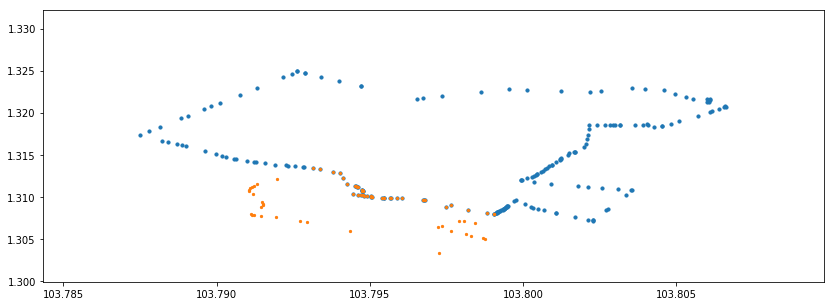

In [26]:
from collections import defaultdict
b1 = [row for index, row in df.iterrows()][138]["boundary"]
b2 = [row for index, row in df.iterrows()][60]["boundary"]
plt.figure(figsize=(14,5))
plt.scatter([x for x,_,_ in b1[0]],
            [y for _,y,_ in b1[0]], s=10)            
plt.scatter([x for x,_,_ in b2[0]],
            [y for _,y,_ in b2[0]], s=5)
plt.show()

## Plot graph

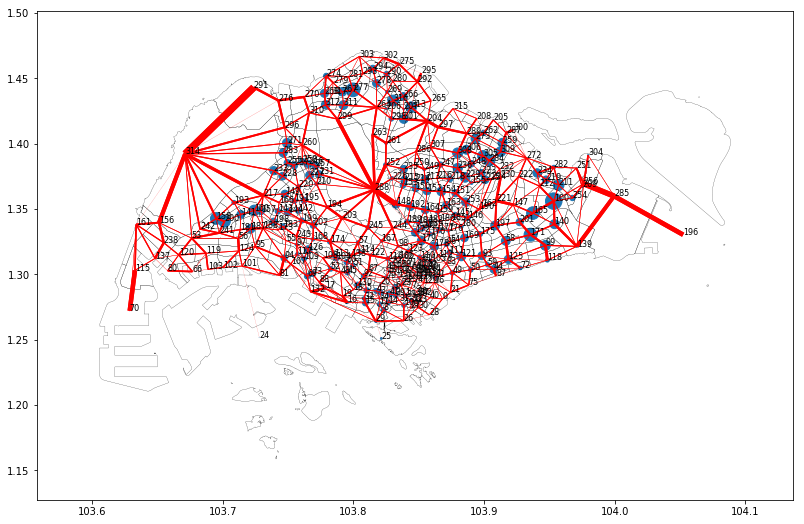

CPU times: user 3.68 s, sys: 235 ms, total: 3.92 s
Wall time: 3.94 s


In [27]:
%%time
fig, ax = plt.subplots(figsize=(14,9))

# plot population mass
plt.scatter(df["x_centre"], df["y_centre"], df["TOTAL"]/500)
for i,(x,y) in enumerate(zip(df["x_centre"], df["y_centre"])):
    plt.text(x,y,i,fontsize=8)
lines = []

# plot subzone boundaries
for i,rings in enumerate(df["boundary"]):
    for b in rings:
        n = len(b)
        for e,_ in enumerate(b):
            lines.append([[b[e%n][0], b[e%n][1]], [b[(e+1)%n][0], b[(e+1)%n][1]]])
lc = mc.LineCollection(lines, colors="black", linewidths=0.2)
ax.add_collection(lc)

# plot connecting subzones
lines_adj = []
linewidths = []
for i,(adjacent,shared_param) in enumerate(zip(df["adjacent"], df["shared_param"])):
    for adj,par in zip(adjacent,shared_param):
        lines_adj.append([[df["x_centre"][i], df["y_centre"][i]], 
                          [df["x_centre"][adj], df["y_centre"][adj]]])
        linewidths.append(par*100)
lc_adj = mc.LineCollection(lines_adj, colors="red", linewidths=linewidths)
ax.add_collection(lc_adj)

ax.autoscale()
ax.set_aspect(1)
ax.margins(0.1)
plt.show()

## Adjacency matrix

In [28]:
matrix = np.zeros((df.shape[0],df.shape[0]))
for i,(adjacent,shared_param) in enumerate(zip(df["adjacent"], df["shared_param"])):
    for adj,par in zip(adjacent,shared_param):
        matrix[i,adj] = np.log(par+0.00001) + np.log(1+df["TOTAL"][i]*df["TOTAL"][adj])

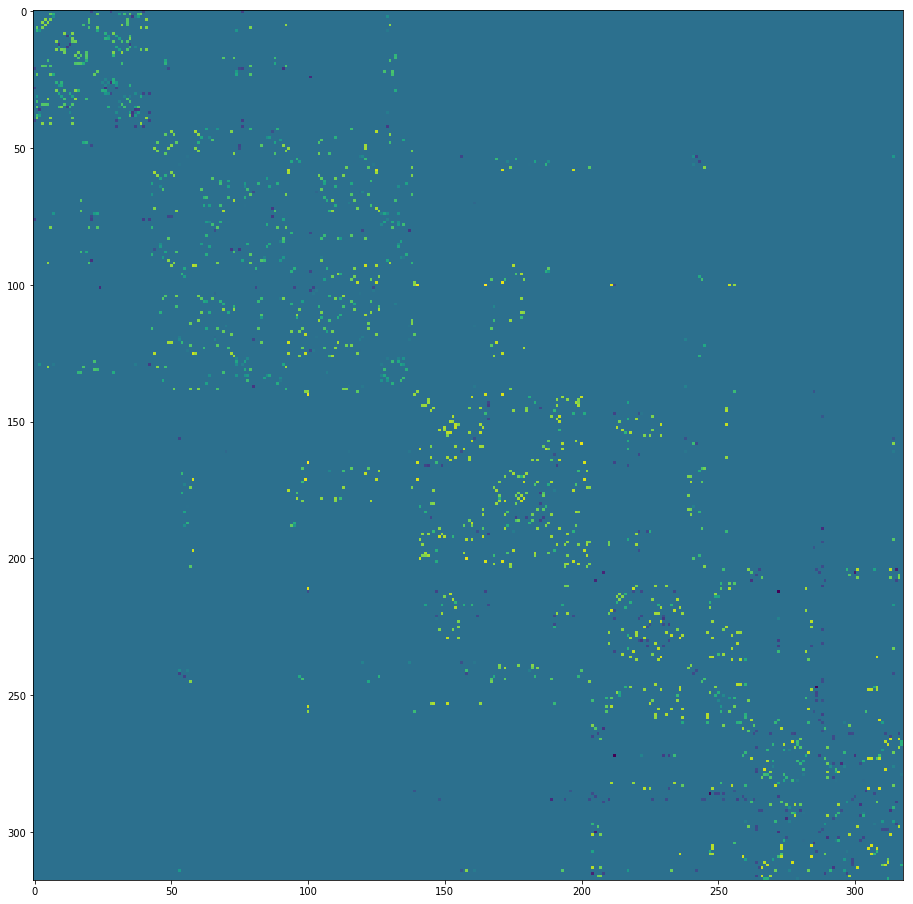

In [29]:
fig, ax = plt.subplots(figsize=(16,16))
ax = plt.imshow(matrix)
plt.show()

In [30]:
df.to_pickle("processed_dataframe.pkl")

In [31]:
# check if all subzone have shared boundaries
[i for i,ls in enumerate(df["shared_param"]) if ls == []]

[]